# Hospital Readmissions Data Analysis and Recommendations for Reduction

Tamara Monge

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/tami/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(0, 2740)

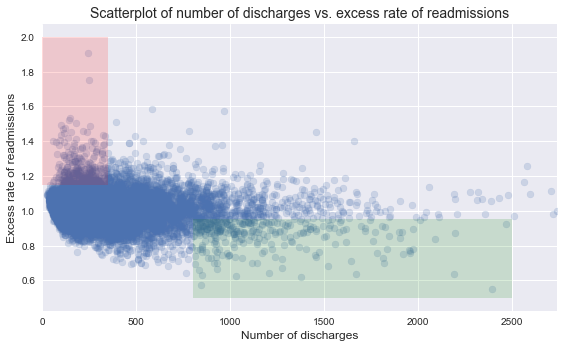

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

****

### A. Do you agree with the above analysis and recommendations? Why or why not?



In general, I find the above recommendations suspect because they are based on one scatter plot of the data, with no accompanying statistical analysis to substantiate the claims. 

The missing data was handled appropriately (dropping rows without discharge information).

The plot is slightly misleading because it does not show the three outlier hospitals with the highest number of discharges. 

The claim that there is "a significant correlation between hospital capacity (number of discharges) and readmission rates" is unfounded. The correlation coefficient is not calculated, nor is the p-value. The claim may turn out to be true, but we cannot know that with the analysis provided.

I think the policy recommendations may be premature. Further analysis needs to be performed to rule out other possible explanations.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### 1. Setup and appropriate hypothesis test

$H_0$: The distribution of excess readmission rate (ERR) is the same for large hospitals (number of discharges > 100) and small hospitals (number of discharges <= 100). 

$H_A$: The distribution of ERR is significantly different for large hospitals and small hospitals. 


In [5]:
# Clean dataset
df = hospital_read_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
# Drop irrelevant columns
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows that are missing Discharge information 
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Drop nulls 
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [7]:
# Separate observations by hospital size
large = df[df['Number of Discharges'] > 100]
small = df[df['Number of Discharges'] <= 100]

LARGE


count    10274.000000
mean         1.005768
std          0.095046
min          0.549500
25%          0.947725
50%          1.000800
75%          1.059600
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

SMALL


count    1223.000000
mean        1.022088
std         0.058154
min         0.893500
25%         0.983800
50%         1.016700
75%         1.052750
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

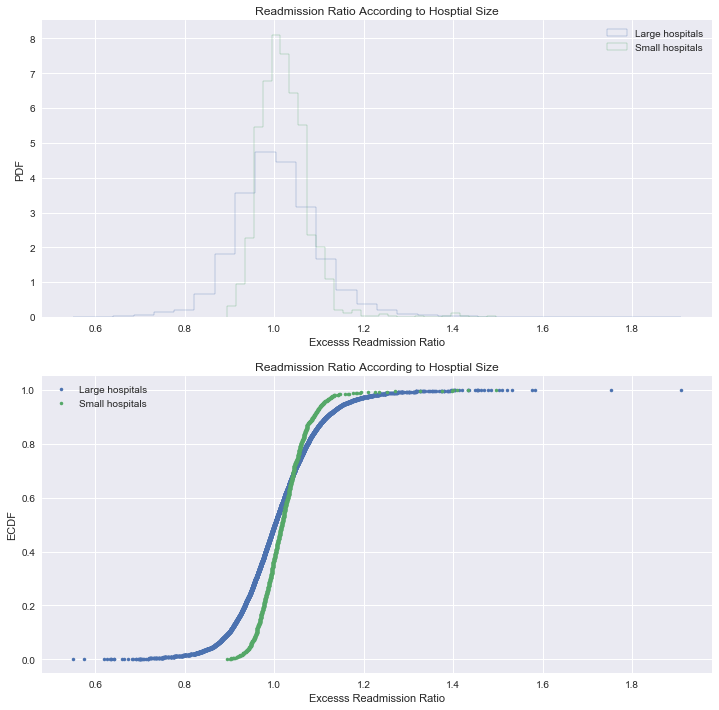

In [8]:
# Perform a little EDA
# Descriptive statistics 
print('LARGE')
large['Excess Readmission Ratio'].describe()
print('SMALL')
small['Excess Readmission Ratio'].describe()
large_mean = np.mean(large['Excess Readmission Ratio'])
small_mean = np.mean(small['Excess Readmission Ratio'])

# Compute ecdfs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

x_large, y_large = ecdf(large['Excess Readmission Ratio'])
x_small, y_small = ecdf(small['Excess Readmission Ratio'])

# Examine differences visually
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(large['Excess Readmission Ratio'], bins=30, normed=True, histtype='step')
_ = plt.hist(small['Excess Readmission Ratio'], bins=30, normed=True, histtype='step')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

The figures above show that large hospitals have a fairly normal distribution of excess readmission ratio (ERR), centered on 1.006. Small hospitals, however, show a distribution that is skewed toward higher ERRs, and centered on 1.022. In addition, we see that the spread of the distribution is narrower (smaller standard deviation) for small hospitals than for large hospitals. Let's see if there is a statistically significant difference in the distributions.

#### 2. Compute and report the observed significance value (or p-value).

In [9]:
# Null hypothesis: The distributions of ERR for large and small hospitals are identical.
# Define test statistic 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_obs = diff_of_means(large['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

# Draw permutation replicates
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((large['Excess Readmission Ratio'], small['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_large = both_perm[:len(large)]
    perm_small = both_perm[len(large):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_large, perm_small)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('observed difference:',diff_obs)
print('p-value:',p_value)

observed difference: -0.01632073298728165
p-value: 0.0


The p-value is 0. This means that in 100,000 trials not a single trial produced a difference in means as great as observed (0.016). Therefore, we reject the null hypothesis and conclude there is a statistically significant difference in the ERR for large and small hospitals. 

In [10]:
r = np.corrcoef(df['Number of Discharges'], df['Excess Readmission Ratio'])[0, 1]
print('The pearson correlation coefficient between the size of hospital (number of discharges) and the ERR is: ', r)

The pearson correlation coefficient between the size of hospital (number of discharges) and the ERR is:  -0.0973979435108


#### 3. Report statistical significance for $\alpha$ = .01. 

A p-value of 0 in 100,000 trials means that p <= 1e-05. This means that our result remains statistically significant for $\alpha$ = 0.01.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The resesarchers describe the ERR as a "measure of a hospital’s readmission performance compared to the national average for the hospital’s set of patients with that applicable condition" [http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html]. The data display a difference in mean ERR for large and small hospitals of 0.016 (small hospitals have a greater mean ERR). Our analysis shows this difference is statistically significant. If we assume the desired ERR is 1, the difference in mean ERR for large and small hospitals represents a 1.6% increase over the desired ratio. Since we have no financial information, it is difficult to assess practical significance from the business perspective; we cannot say whether the cost of regulation aimed at reducing small hospital's ERR would be worth the investment. What we can say, however, is that if all other considerations are equal and a patient has the option to choose between a small and large hospital, the patient should choose the large hospital as they may expect marginally better care at a large hosptial. 

#### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

**- The advantages of using the above scatter plot to convey information are:** 
1. It shows (almost) all of the data rather than summary statistics.
2. It communicates a small negative correlation between ERR and hospital size. 

**- The disadvantages of using the above scatter plot are:** 
1. It inexplicably does not show the three largest hospitals. 
2. The shaded areas do not correspond to the discussion as well as they could. It would make more sense if the red shaded box were expanded to 0-100 in the x-direction and 1.0-2.0 in the y-direction. Likewise, it would make more sense if the green shaded box were expanded to 100-7000 in the x-direction and 0.5-1.0 in the y-direction. Then these boxes would highlight the areas discussed in the preliminary report. 

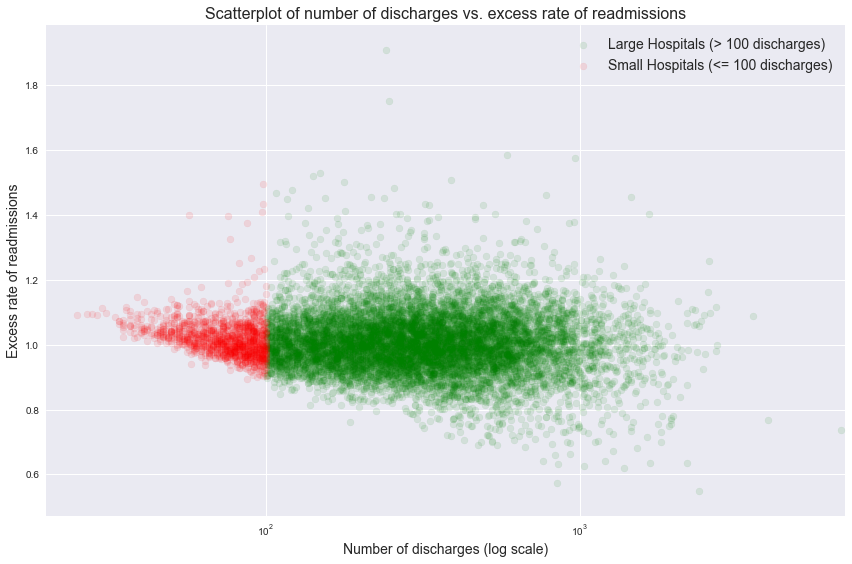

In [11]:
x_large = [a for a in large['Number of Discharges']]
y_large = list(large['Excess Readmission Ratio'])

x_small = [a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.scatter(x_large, y_large, color='green', alpha=0.1)
_ = ax.scatter(x_small, y_small, color='red', alpha=0.1)


_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges (log scale)', fontsize=14)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=14)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=16)
_ = ax.legend(['Large Hospitals (> 100 discharges)', 'Small Hospitals (<= 100 discharges)'], fontsize=14)

ax.grid(True)
fig.tight_layout()

My alternative scatterplot uses colored markers to make it easier to identify the distinct groups examined in the analysis. The markers are more transparent than in the preliminary scatterplot, so as to make the areas with greater density of points more evident. Lastly, the x-scale is logarithmic in order to provide a clearer visualization of the trend in the data (If we were to use a linear scale, the red points would be bunched up in the left-most 5% or so of the figure, even if we were to trim the upper x-limit to 3000 discharges.). 